# DonorsChoose.org - Clustering Solutions
***
<b>Class: </b>CMPE_257 Machine Learning <br>
<b>Team: </b>Vidhi Shah, Sithara KrishnaMurthy, Pragya Gautam, Reetika Goel <br>
***
<b>Business Objective:</b> <br>There is fantastic saying by Mother Teresa that says “It’s not how much we give but how much love we put into giving.”
In this age, technology has made it so much easier for everyone to give and by that it has helped millions of people globally. Donations can be made through a small text message or just a simple click of a button. The team at DonorsChoose.org does an amazing job to support the public education there by bringing classroom dreams to life for teachers and students all over United States.

Speaking about statistics, It has already raised $685 million through 3 million people and partners funding 1.1 million DonorsChoose.org projects. But teachers still spend more than a billion dollars of their own money on classroom materials. To get students what they need to learn and based on the data available regarding the donors, donations and classroom materials requirement, the organization would like to pair up donors to the classroom requests that will most motivate them to make an additional gift.

The email marketing campaigns will surely be able to connect donors with the projects that most inspires them and we “The Seekers” team, as data scientists or as machine learning engineers are ready to take up the challange to find and help them.<br><br>
<b>Kaggle Link:</b> https://www.kaggle.com/donorschoose/io/home

<b> Import Libraries</b><br>
@Author: Team

In [0]:
# @Author: Team

import pandas as pd
import numpy as np
import warnings
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

warnings.filterwarnings("ignore")

<b> Read CSVs</b><br>
@Author: Team

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# read csvs
df_donations = pd.read_csv("/content/drive/Team Drives/The Seekers - Machine Learning Project/DataSets/Donations.csv")
df_projects = pd.read_csv("/content/drive/Team Drives/The Seekers - Machine Learning Project/DataSets/Projects.csv")
df_schools = pd.read_csv("/content/drive/Team Drives/The Seekers - Machine Learning Project/DataSets/Schools.csv")
df_donors = pd.read_csv("/content/drive/Team Drives/The Seekers - Machine Learning Project/DataSets/Donors.csv")

<b> Print inital shapes for all CSVs</b><br>
@Author: Reetika

In [0]:
# print inital shapes for all csvs
print("Shape of Donations Data:",df_donations.shape,'\n')
print("Shape of Donors Data:",df_donors.shape,'\n')
print("Shape of Projects Data:",df_projects.shape,'\n')
print("Shape of Schools Data:",df_schools.shape,'\n')

Shape of Donations Data: (4687884, 7) 

Shape of Donors Data: (2122640, 5) 

Shape of Projects Data: (1110017, 18) 

Shape of Schools Data: (72993, 9) 



<b> View Data</b><br>
@Author: Reetika

In [0]:
df_donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [0]:
df_donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [0]:
df_projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


In [0]:
df_schools.head()

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


## Pre-Processing

<b>Null Check - Checking for columns with Null or Missing values in the datasets.</b><br>
@Author : Sithara

In [0]:
# Checking the nulls count of given files

def null_check(df,name):
    print(name)
    print('Number of rows and cols are {} and {}'.format(df.shape[0],
            df.shape[1]))
    print('Number of nulls are \n{}'.format(df.isnull().sum()),'\n')
    

null_check(df_donations,'Donations')
null_check(df_donors,'Donors')
null_check(df_projects,'Projects')
null_check(df_schools,'Schools')

Donations
Number of rows and cols are 4687884 and 7
Number of nulls are 
Project ID                             0
Donation ID                            0
Donor ID                               0
Donation Included Optional Donation    0
Donation Amount                        0
Donor Cart Sequence                    0
Donation Received Date                 0
dtype: int64 

Donors
Number of rows and cols are 2122640 and 5
Number of nulls are 
Donor ID                 0
Donor City          213097
Donor State              0
Donor Is Teacher         0
Donor Zip           180060
dtype: int64 

Projects
Number of rows and cols are 1110017 and 18
Number of nulls are 
Project ID                               0
School ID                                0
Teacher ID                               0
Teacher Project Posted Sequence          0
Project Type                             0
Project Title                            6
Project Essay                            1
Project Short Description      

<b>Mapping Categorical Values</b>
<font>Converting coulmns with text to numeric.<br/><br/><b> Donor Is Teacher </b><ul><li>No - 0</li><li>Yes - 1</li></ul><b>Project Type</b><br/> <ul><li>Teacher-Led - 1</li><li>Professional Development - 2</li><li>Student-Led - 3</li></ul></font><br>
@Author : Sithara

In [0]:
df_donors['Donor Is Teacher']= df_donors['Donor Is Teacher'].map({'No':0,'Yes':1})
df_projects['Project Type']= df_projects['Project Type'].map({'Teacher-Led':1,'Professional Development':2,'Student-Led':3})

<b>Merging Donations + Donors + Projects + Schools to get all the donors with donations count >=2</b><br>
@Author : Vidhi

In [0]:
# Get the donations count per donor ID
donations_count = pd.DataFrame(
    df_donations.groupby("Donor ID")['Project ID'].count()
)

donations_count.reset_index(inplace = True)
donations_count.rename(columns = {'Project ID':'Donations_Count'},
                       inplace = True)
donations_count.head()

,Donor ID,Donations_Count
0,00000ce845c00cbf0686c992fc369df4,1
1,00002783bc5d108510f3f9666c8b1edd,1
2,00002d44003ed46b066607c5455a999a,11
3,00002eb25d60a09c318efbd0797bffb5,5
4,0000300773fe015f870914b42528541b,1


In [0]:
# Select target donors with donations count>= 2
target_donors = donations_count[donations_count['Donations_Count'] >= 2]

# For all the donors above get all information from donations csv and sort it by donation date desc

target_donations = df_donations[df_donations['Donor ID'].isin(target_donors['Donor ID'])]
target_donations = target_donations.sort_values('Donation Received Date', ascending=False)

# Drop duplicate values and populate target_donors with only Donor ID

target_donors = target_donations.drop_duplicates('Donor ID', keep='first')['Donor ID']
target_donors = target_donors.to_frame(name='Donor ID').reset_index()

# Select target projects : First merge target_donors and donations, get unique projects out of it to create 
                        # target_projects data frame. Finally get all the projects from df_projects that belongs 
                        # to target_projects

target_projects = target_donors.merge(target_donations, on='Donor ID')
target_projects = target_projects['Project ID'].unique()
target_projects = df_projects[df_projects['Project ID'].isin(target_projects)]

target_projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,1,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,1,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,1,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,1,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,1,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


In [0]:
# merged DataFrames
def merge_dataframes(source,dest,joincol):
    merged_df = source.merge(dest, on=joincol)
    print(merged_df.shape)
    return merged_df

merged_donation = merge_dataframes(target_donations,target_projects,'Project ID')
merged_donation = merge_dataframes(merged_donation,df_donors,'Donor ID')
merged_donation_school = merge_dataframes(merged_donation,df_schools,'School ID')

(3157585, 24)
(3156926, 28)
(3156904, 36)


## Visualization<br>
@Author : Reetika

<b>Plot that shows which metro type do schools come from</b><br>

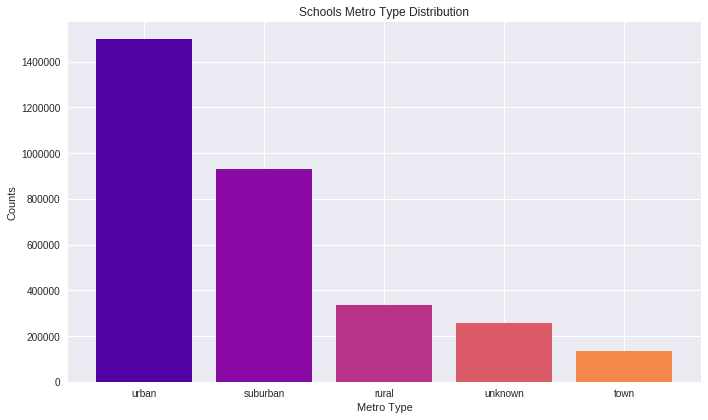

In [0]:
plt.figure(figsize=(10,6))
plt.bar(merged_donation_school['School Metro Type'].value_counts().index, 
        merged_donation_school['School Metro Type'].value_counts(),
        color=sns.color_palette('plasma'))
plt.xlabel('Metro Type')
plt.ylabel('Counts')
plt.title('Schools Metro Type Distribution')
plt.tight_layout()

<b>Plot that shows Distribution of Donors across US States</b><br>

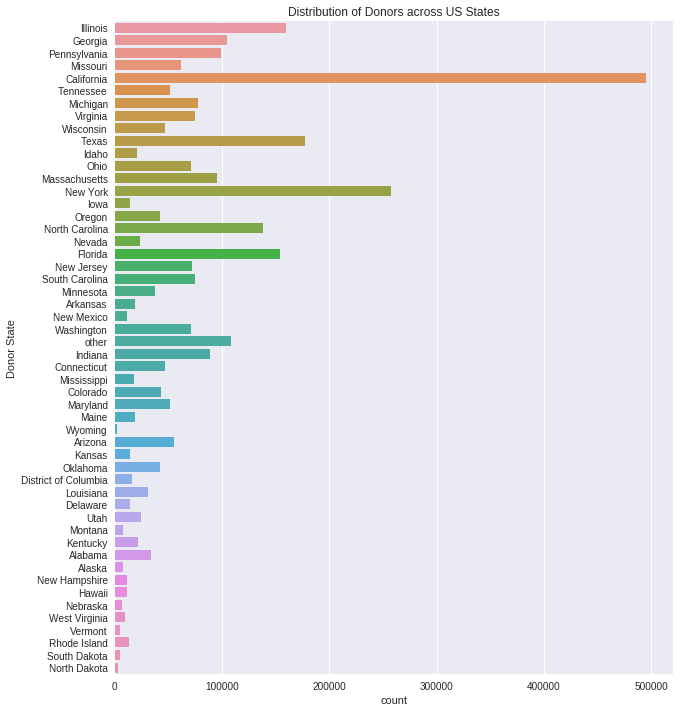

In [0]:
plt.figure(figsize=(10,12))
plt.title('Distribution of Donors across US States')
sns.countplot(y=merged_donation_school['Donor State'])

<b>Prepare DataFrame for Clustering</b><br/>
<font>Here we are creating 2 datasets, X and X1. X is the dataset which will be used for clustering and X1 is the dataset with the addidtional column 'School Metro Type' which will be used for interpreting the clusters that have been formed.</font><br>
@Author : Pragya

In [0]:
X = merged_donation_school[['Project Cost', 'Donation Amount', 'Donor Cart Sequence', 'Donor Is Teacher', 'Project Type']]
X1 = merged_donation_school[['Project Cost', 'Donation Amount', 'Donor Cart Sequence', 'Donor Is Teacher', 'Project Type','School Metro Type']]
X.head()

,Project Cost,Donation Amount,Donor Cart Sequence,Donor Is Teacher,Project Type
0,166.98,58.15,46,0,1
1,166.98,25.00,3,0,1
2,166.98,50.00,209,0,1
3,166.98,10.00,24,1,1
4,812.13,10.00,23,1,1


In [0]:
GMM_X = X
GMM_X.head(2)

,Project Cost,Donation Amount,Donor Cart Sequence,Donor Is Teacher,Project Type
0,166.98,58.15,46,0,1
1,166.98,25.00,3,0,1


In [0]:
null_check(X,'X')

X
Number of rows and cols are 3156904 and 5
Number of nulls are 
Project Cost           0
Donation Amount        0
Donor Cart Sequence    0
Donor Is Teacher       0
Project Type           0
dtype: int64 



<b> Change column type from Int to Float </b> <br>
@Author : Pragya

In [0]:
def typecast(column):
    X[column]=X[column].astype(float)
    print(X.dtypes,'\n')
    
typecast('Donor Cart Sequence')
typecast('Donor Is Teacher')
typecast('Project Type')

Project Cost           float64
Donation Amount        float64
Donor Cart Sequence    float64
Donor Is Teacher         int64
Project Type             int64
dtype: object 

Project Cost           float64
Donation Amount        float64
Donor Cart Sequence    float64
Donor Is Teacher       float64
Project Type             int64
dtype: object 

Project Cost           float64
Donation Amount        float64
Donor Cart Sequence    float64
Donor Is Teacher       float64
Project Type           float64
dtype: object 



<b> Scale the data using StandardScaler</b><br/>
<font>As the data in each column has a different range, processing them to be within the same scale.</font><br>
@Author : Sithara

In [0]:
def scaled_data(df):
    StandardScaler_processed = preprocessing.StandardScaler().fit_transform(df)
    df = pd.DataFrame(StandardScaler_processed, index=df.index, columns=df.columns)
    print(StandardScaler_processed)
    return df

X = scaled_data(X)

[[-2.35346597e-01 -3.50017067e-02 -1.54685954e-01 -7.98574967e-01
  -1.26997616e-01]
 [-2.35346597e-01 -2.17720894e-01 -1.95525547e-01 -7.98574967e-01
  -1.26997616e-01]
 [-2.35346597e-01 -7.99236186e-02  1.24595669e-04 -7.98574967e-01
  -1.26997616e-01]
 ...
 [-2.29874896e-01 -2.45280349e-01 -1.97425063e-01  1.25223059e+00
  -1.26997616e-01]
 [-8.17411724e-02 -1.47609640e-01 -1.96475305e-01  1.25223059e+00
  -1.26997616e-01]
 [-8.17411724e-02  2.41674254e+00 -1.97425063e-01  1.25223059e+00
  -1.26997616e-01]]


In [0]:
X.head()

,Project Cost,Donation Amount,Donor Cart Sequence,Donor Is Teacher,Project Type
0,-0.235347,-0.035002,-0.154686,-0.798575,-0.126998
1,-0.235347,-0.217721,-0.195526,-0.798575,-0.126998
2,-0.235347,-0.079924,0.000125,-0.798575,-0.126998
3,-0.235347,-0.300399,-0.175581,1.252231,-0.126998
4,-0.002031,-0.300399,-0.176530,1.252231,-0.126998


## K-Means Clustering

<b>Identify Optimum Clusters K using Elbow Method</b><br/><br/>
<font>Initialize k-means for each value and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.<br/><br/>Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.</font><br>
@Author : Pragya and Vidhi

In [0]:
def k_means(df,no_of_clusters):
    kmeans = KMeans(n_clusters=no_of_clusters)
    kmeans_model = kmeans.fit(df)
    return kmeans

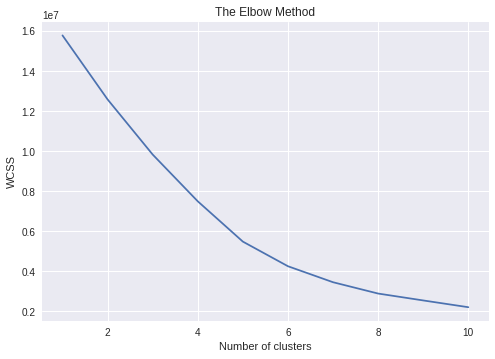

In [0]:
def elbow(df):
    wcss = []
    for i in range(1,11):
        kmeans = k_means(df,i)
        wcss.append(kmeans.inertia_) #within-cluster sums of squares
    plt.plot(range(1,11),wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    

elbow(X)

<font>In the plot above the elbow is at <b>k=5</b> indicating the optimal k for this dataset is 5</font>

<b> Run K-Means</b><br>
@ Author : Reetika & Sithara

In [0]:
kmeans = k_means(X,5)

In [0]:
kmeans.cluster_centers_

array([[-7.26494066e-03,  9.50698256e-02, -1.25611903e-01,
        -7.96762796e-01, -1.26997616e-01],
       [-3.64506628e-02, -1.47820004e-01, -3.65314127e-02,
         1.25223059e+00, -1.26997616e-01],
       [ 1.94256459e-01,  3.45436154e-02, -1.25538220e-03,
         1.75730200e-01,  7.02243654e+00],
       [-7.55882000e-02, -1.63701358e-01,  8.37424259e+00,
        -2.14493341e-01, -8.72831669e-02],
       [ 4.13539790e+01,  1.14889999e+00, -6.44089594e-02,
        -3.19821548e-01,  1.77694894e-02]])

## K-means Cluster/Data Interpretation

<font><b>Below we are mapping the different 'School Metro Types' to numeric values and are comparing them against the Cluster Labels (pred_clusters) that have been obtained by performing k-Means. </b></font><br>
@Author : Vidhi & Sithara

In [0]:
def converter(x):
   if x=='suburban':
       return 0
   elif x=='urban':
       return 1
   elif x=='rural':
       return 2
   elif x=='town':
       return 3
   else:
       return 4
    
X1['cluster']=X1['School Metro Type'].apply(converter)
X1.head()

,Project Cost,Donation Amount,Donor Cart Sequence,Donor Is Teacher,Project Type,School Metro Type,cluster
0,166.98,58.15,46,0,1,urban,1
1,166.98,25.00,3,0,1,urban,1
2,166.98,50.00,209,0,1,urban,1
3,166.98,10.00,24,1,1,urban,1
4,812.13,10.00,23,1,1,urban,1


In [0]:
X1['pred_clusters']=kmeans.labels_
X1.head()

,Project Cost,Donation Amount,Donor Cart Sequence,Donor Is Teacher,Project Type,School Metro Type,cluster,pred_clusters
0,166.98,58.15,46,0,1,urban,1,0
1,166.98,25.00,3,0,1,urban,1,0
2,166.98,50.00,209,0,1,urban,1,0
3,166.98,10.00,24,1,1,urban,1,1
4,812.13,10.00,23,1,1,urban,1,1


<font><b>Below are plots of the 'School Metro Type' and 'Cluster Labels' based on the 'Project Cost' and 'Donation Amount'.</b></font><br>
@Author : Pragya & Reetika

<Figure size 864x432 with 0 Axes>

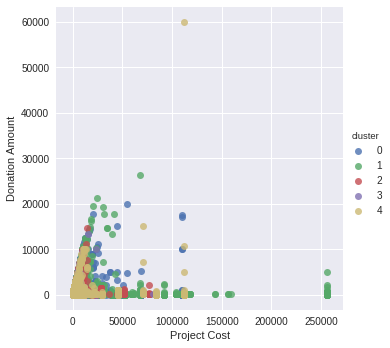

<Figure size 864x432 with 0 Axes>

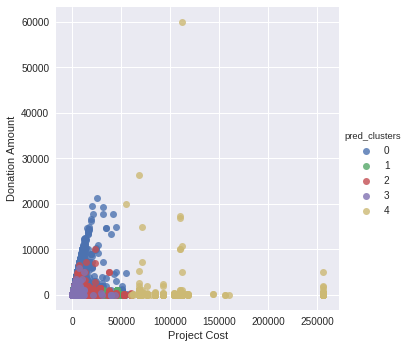

In [0]:
def plot_clusters(xcol,ycol,df,cluster):
    plt.figure(figsize=(12,6))
    sns.lmplot(x=xcol, y=ycol,data=df, hue=cluster, fit_reg=False)
    
plot_clusters('Project Cost','Donation Amount',X1,'cluster')
plot_clusters('Project Cost','Donation Amount',X1,'pred_clusters')

<Figure size 864x432 with 0 Axes>

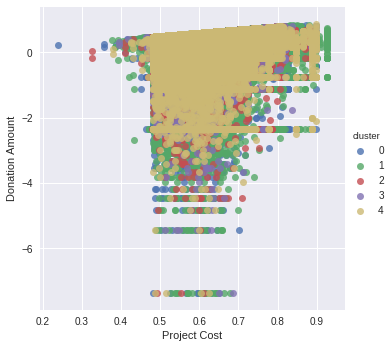

<Figure size 864x432 with 0 Axes>

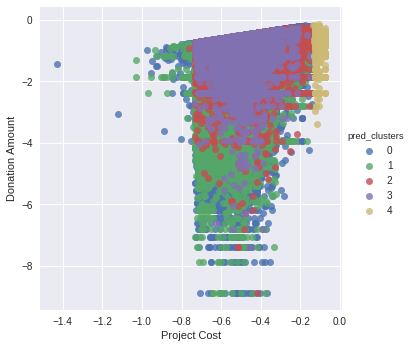

In [0]:
#Plot using the log
def plot_clusters_withLog(xcol,ycol,df,cluster):
    df["Project Cost"]= df["Project Cost"].apply(np.log) 
    df["Donation Amount"]= df["Donation Amount"].apply(np.log)
    plt.figure(figsize=(12,6))
    sns.lmplot(x=xcol, y=ycol,data=df, hue=cluster, fit_reg=False)
    
plot_clusters_withLog('Project Cost','Donation Amount',X1,'cluster')
plot_clusters_withLog('Project Cost','Donation Amount',X1,'pred_clusters')

**On plotting the datapoints and clusters using log of the column values, results in the above plots. We can note that even though both the plots are representing clusters, they are scaled on different x and y axis.**

<font><b> By filtering the records with same 'School Metro Type' and cluster label. It can be identified that the clustering has resulted in grouping the records based on the Metro Type. Thus creating groups of records based on the School Metro Type.</b></font><br>
@ Author : Vidhi & Pragya

In [0]:
X1[X1['pred_clusters'] == X1['cluster']] #254503 rows × 8 columns 
# After changing Standard Scalar and elbow method : 618874

,Project Cost,Donation Amount,Donor Cart Sequence,Donor Is Teacher,Project Type,School Metro Type,cluster,pred_clusters
3,1.632739,0.834032,24,1,1,urban,1,1
4,1.902057,0.834032,23,1,1,urban,1,1
5,1.902057,1.169032,21,1,1,urban,1,1
6,1.902057,1.364055,22,1,1,urban,1,1
7,1.902057,0.834032,20,1,1,urban,1,1
8,1.902057,1.169032,19,1,1,urban,1,1
9,1.647239,0.834032,24,1,1,urban,1,1
10,1.645593,0.834032,24,1,1,urban,1,1
11,1.863406,1.630406,18,1,1,urban,1,1
12,1.747496,0.834032,16,1,1,urban,1,1


In [0]:
X1.describe()

,Project Cost,Donation Amount,Donor Cart Sequence,Donor Is Teacher,Project Type,cluster,pred_clusters
count,3.156904e+06,3.156592e+06,3.156904e+06,3.156904e+06,3.156904e+06,3.156904e+06,3.156904e+06
mean,1.839099e+00,-inf,2.088688e+02,3.893957e-01,1.025320e+00,1.141529e+00,4.459398e-01
std,1.111503e-01,NaN,1.052900e+03,4.876133e-01,1.993718e-01,1.134409e+00,5.918777e-01
min,1.270771e+00,-inf,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.765976e+00,8.340324e-01,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.832479e+00,1.169032e+00,5.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,1.909817e+00,1.364055e+00,3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,2.521874e+00,2.398086e+00,1.811600e+04,1.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00


In [0]:
X1[X1['Donation Amount'] == 60000.0]

,Project Cost,Donation Amount,Donor Cart Sequence,Donor Is Teacher,Project Type,School Metro Type,cluster,pred_clusters


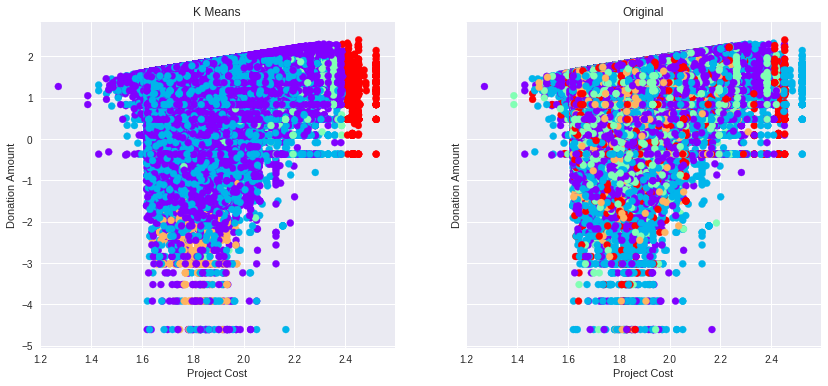

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6))
ax1.set_title('K Means')
ax1.set_xlabel('Project Cost')
ax1.set_ylabel('Donation Amount')
ax1.scatter(X1['Project Cost'],X1['Donation Amount'],c=X1['pred_clusters'],cmap='rainbow')
ax2.set_title('Original')
ax2.set_xlabel('Project Cost')
ax2.set_ylabel('Donation Amount')
ax2.scatter(X1['Project Cost'],X1['Donation Amount'],c=X1['cluster'],cmap='rainbow')

<font><b> On performing k-Means on the dataset, we can identify that the range of Project cost and the donations that are received in different school types.<br/><ul><li>The donations are high for schools located in the sub-urban region.</li><li>The donations are low in Town regions.</li><li>The highest donation amount and highest project cost are from the Unknown regions; but in the actual data we can identify that the highest project cost is for the Urban region. </li><li>The Total number of matching datapoints between the Original and K-Means predicted clusters are 620,271.</li></ul></b>
</font>

## GMM Clustering

<b> Initialize GMM Function and Run it to get clusters </b><br>
@Author : Sithara & Reetika

In [0]:
from sklearn.mixture import GaussianMixture
def GMM_clusters(numOfClusters,data):
    gmm = GaussianMixture(n_components=numOfClusters).fit(data)
    labels = gmm.predict(data)
    return labels

In [0]:
GMM_X['gmm_cluster'] = GMM_clusters(5,X)
GMM_X.head(2)

,Project Cost,Donation Amount,Donor Cart Sequence,Donor Is Teacher,Project Type,gmm_cluster
0,166.98,58.15,46.0,0.0,1.0,0
1,166.98,25.00,3.0,0.0,1.0,0


In [0]:
GMM_X['gmm_cluster'].value_counts()

0    1656202
4    1097458
3     212462
2     121357
1      69425
Name: gmm_cluster, dtype: int64

<Figure size 864x432 with 0 Axes>

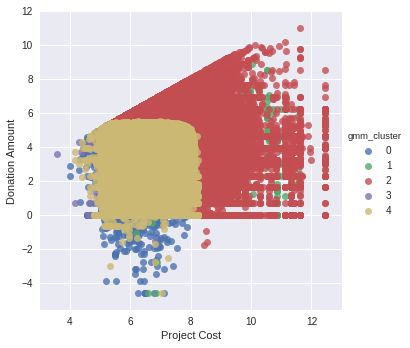

In [0]:
plot_clusters_withLog('Project Cost','Donation Amount',GMM_X,'gmm_cluster')

## GMM Cluster/Data Interpretation <br>
@Author : Vidhi & Pragya

In [0]:
GMM_X['cluster'] = X1['cluster']
print(GMM_X.shape)
GMM_X.head(2)

(3156904, 7)


,Project Cost,Donation Amount,Donor Cart Sequence,Donor Is Teacher,Project Type,gmm_cluster,cluster
0,5.117874,4.063026,46.0,0.0,1.0,0,1
1,5.117874,3.218876,3.0,0.0,1.0,0,1


In [0]:
GMM_X[GMM_X['gmm_cluster'] == GMM_X['cluster']]

,Project Cost,Donation Amount,Donor Cart Sequence,Donor Is Teacher,Project Type,gmm_cluster,cluster
55,6.990367,1.609438,164.0,1.0,2.0,1,1
272,7.291820,1.609438,3.0,1.0,2.0,1,1
273,6.990367,1.609438,2.0,1.0,2.0,1,1
951,6.350205,4.974732,1086.0,0.0,1.0,1,1
952,6.048223,3.959479,1022.0,0.0,2.0,1,1
1174,6.466440,3.526361,17.0,0.0,3.0,1,1
1194,5.928578,3.912023,53.0,0.0,2.0,1,1
1347,6.768470,2.708050,201.0,1.0,3.0,1,1
1352,7.959084,0.693147,196.0,1.0,3.0,1,1
1377,6.898301,3.912023,168.0,1.0,2.0,1,1


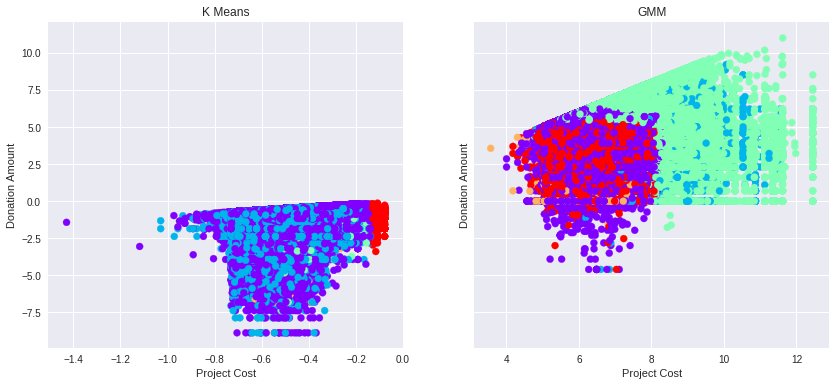

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6))
ax1.set_title('K Means')
ax1.set_xlabel('Project Cost')
ax1.set_ylabel('Donation Amount')
ax1.scatter(X1['Project Cost'],X1['Donation Amount'],c=X1['pred_clusters'],cmap='rainbow')
ax2.set_title('GMM')
ax2.set_xlabel('Project Cost')
ax2.set_ylabel('Donation Amount')
ax2.scatter(GMM_X['Project Cost'],GMM_X['Donation Amount'],c=GMM_X['gmm_cluster'],cmap='rainbow')

**On plotting the datapoints and clusters using log of the column values, results in the above plots. We can note that even though both the plots are representing clusters, they are scaled on different x and y axis.**

## New Insights
**As the scale previously applied on the original data was too large, we tried to vizualise the same clusters by using the log values, to get a more compact view and a smaller scale of the data. As the clusters still seem to be very crowded due to the large number of data points, we would like to drill down further into each cluster by applying Fractal Clustering as our next steps.**